## Setup

First, we set up our notebook by downloading the appropriate packages

### Dependencies

In [1]:
pip install matplotlib scipy pandas numpy networkx seaborn scikit-learn cython

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/41/f1/115e7c79b4506b4f0533acba742babd9718ff92eeca6d4205843173b6173/matplotlib-3.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/89/bb/80c9c98d887c855710fd31fc5ae5574133e98203b3475b07579251803662/scipy-1.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scipy-1.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fc/a5/4d82be566f069d7a9a702dcdf6f9106df0e0b042e738043c0cc7ddd7e3f6/pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.ma

### Imports

In [2]:
# base libraries
import importlib
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os

import networkx as nx

import time

from IPython.utils.io import capture_output # supress outputs

from sklearn.metrics.cluster import adjusted_rand_score

### Fix pathway

In [3]:
# fix directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

print("Current working directory:", os.getcwd())

from trcrpm.src import Hierarchical_TRCRP_Mixture, TRCRP_Mixture

Current working directory: /hdsi-collab-persistent/cephfs/Setup


### Helper Functions

1. **`run_model(data, num_chains = 8, p = 5, MCMC_steps=1000, hyperparam_steps=50, runtime = True)`**
    - **Returns**: Fitted model
        - The dataframe index needs to be reset as an integer.
        - Choose a high number for `MCMC_steps` to allow for a burn-in period.
        - `p` is our lag window

2. **`post_dep(model, num_samples)`**
    - **Returns**: Pairwise posterior dependence matrices (cluster probabilities)
        - The array is of size `NUM_SAMPLES x NUM_CHAINS x LEN(DF) x LEN(DF)`

3. **`clustering(post_probs, threshold = 0.75)`**
    - **Returns**: Clusters
        - If time series `i` and `k` are dependent in `threshold%` of samples, they are clustered together.
        - Averages over `NUM_SAMPLES` and `NUM_CHAINS`.

4. **`return_ari(true_labels, predicted_clusters)`**
    - **Returns**: Adjusted Rand Index (ARI) if ground truth is available


In [4]:
import importlib

In [5]:
import experiments.helper_functions as helpers
importlib.reload(helpers)

<module 'experiments.helper_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/helper_functions.py'>

## Data Generation (Sin Waves)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000
1,-0.698144,0.143767,0.211041,0.360933,0.387355,1.109317,0.113211,0.861154,0.438470,0.184232,...,0.202471,0.998971,0.566149,0.004983,-0.191486,-0.290226,-0.009635,0.334477,0.029989,-0.069286
2,-0.371716,-0.387578,2.204021,0.592673,-0.540718,2.886264,-0.181330,-0.568162,1.824790,0.540316,...,-1.137046,2.857236,-0.604883,-0.326535,3.195326,0.619083,-1.016713,3.210947,0.471778,-0.733543
3,0.274139,-2.368298,4.626330,0.203212,-2.004217,4.466122,0.334465,-1.240357,4.922399,0.799949,...,-1.548367,5.229193,0.579379,-1.585510,4.345932,-0.215621,-1.960955,4.888144,0.673766,-2.390926
4,0.151679,-2.218308,4.527189,0.421443,-2.068086,5.017570,-0.008722,-2.719934,5.385504,0.313718,...,-2.704944,5.195163,0.441936,-2.698113,4.993724,0.435381,-2.453055,4.366297,-0.045188,-2.736154


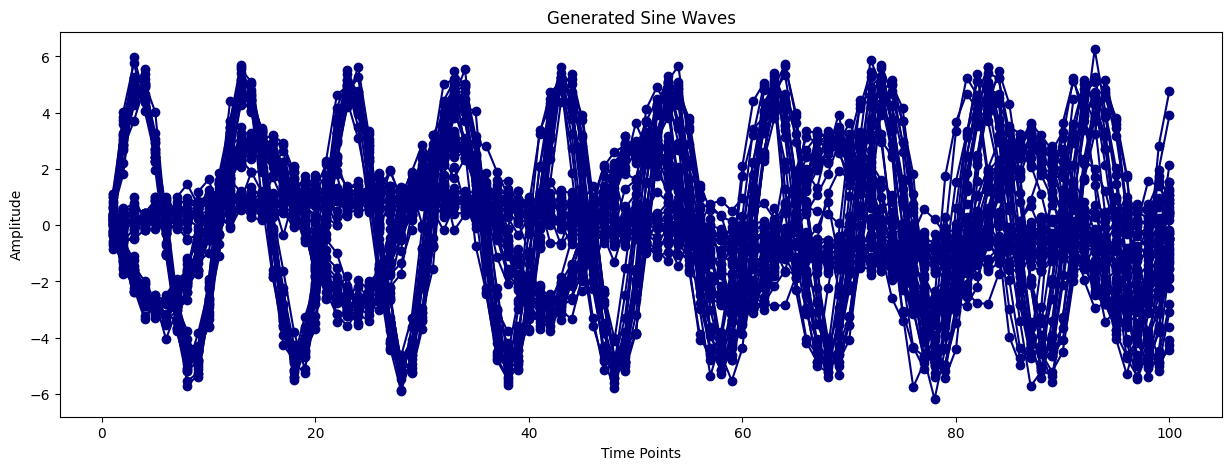

In [7]:
import experiments.data_generation as data_gen
importlib.reload(data_gen)

df = data_gen.generate_sine_wave_data(frequency_noise=0.1, random_state=42, use_colors = False,
                                     num_clusters = 3)
df.head()

## Run Analysis

In [7]:
data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

(100, 50)


In [ ]:
model = helpers.run_model(data)

In [ ]:
dep_matrices = helpers.post_dep(model, 20)

In [ ]:
# compare predicted and true clusters

In [ ]:
predicted_clusters = helpers.clustering(dep_matrices, threshold = 0.75)
predicted_clusters

In [ ]:
helpers.return_ari(labels, predicted_clusters)

In [ ]:
unique_labels = np.unique(labels)
# step size (number of elements per cluster)
step = len(labels) // len(unique_labels)

# clusters as list 
clusters = [[int(label) for label in np.where(labels == label)[0]] for label in unique_labels]
clusters

## Plotting


In [ ]:
import plotting_functions as plot
importlib.reload(plot)

In [ ]:
%%capture
# need to simulate samples for confidence interval
# we sample from the posterior to get confidence interval for forecasted values
# some bug inside .simulate so supressing outputs for now
# bug is in cgpm.src.crosscat.sampling (print statement in simulate_row)
probes = model.dataset.index
numsamples = 10
samples = model.simulate(probes, model.variables, numsamples)

### Helper Functions 

In [ ]:
# compare labels with predicted_labels
plot.plot_df(data, labels)
plot.plot_df(data, predicted_labels)

In [ ]:
plot.plot_cluster_variables(samples, [1, 6, 26, 41], ax, states_from_chain=2)
